In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [4]:
# cifar data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [5]:
#  pixel values given
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
#labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(30, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(60, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(120, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [7]:
# momentum values given
momentum_values_sgd = [0.0, 0.5, 0.9]
momentum_values_rmsprop = [0.0, 0.5, 0.9]
beta1_values_adam = [0.0, 0.5, 0.9]

In [8]:
sgd_history_list = []
adam_history_list = []
rmsprop_history_list = []

In [9]:
# momentum values
for momentum_val in momentum_values_sgd:
    sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=momentum_val)
    sgd_model = create_cnn_model()
    sgd_model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    sgd_history = sgd_model.fit(train_images, train_labels, epochs=12, batch_size=64, validation_data=(test_images, test_labels))
    sgd_history_list.append(sgd_history)

for momentum_val in momentum_values_rmsprop:
    rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=momentum_val)
    rmsprop_model = create_cnn_model()
    rmsprop_model.compile(optimizer=rmsprop_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    rmsprop_history = rmsprop_model.fit(train_images, train_labels, epochs=12, batch_size=64, validation_data=(test_images, test_labels))
    rmsprop_history_list.append(rmsprop_history)

for beta1_val in beta1_values_adam:
    adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=beta1_val)
    adam_model = create_cnn_model()
    adam_model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    adam_history = adam_model.fit(train_images, train_labels, epochs=12, batch_size=64, validation_data=(test_images, test_labels))
    adam_history_list.append(adam_history)


Epoch 1/12
782/782 [==============================] - 15s 6ms/step - loss: 2.1990 - accuracy: 0.1868 - val_loss: 1.9735 - val_accuracy: 0.2812
Epoch 2/12
782/782 [==============================] - 5s 7ms/step - loss: 1.8829 - accuracy: 0.3221 - val_loss: 1.7960 - val_accuracy: 0.3542
Epoch 3/12
782/782 [==============================] - 7s 8ms/step - loss: 1.6786 - accuracy: 0.3984 - val_loss: 1.6508 - val_accuracy: 0.3988
Epoch 4/12
782/782 [==============================] - 4s 6ms/step - loss: 1.5502 - accuracy: 0.4442 - val_loss: 1.4915 - val_accuracy: 0.4616
Epoch 5/12
782/782 [==============================] - 5s 6ms/step - loss: 1.4575 - accuracy: 0.4788 - val_loss: 1.7259 - val_accuracy: 0.3932
Epoch 6/12
782/782 [==============================] - 4s 5ms/step - loss: 1.3867 - accuracy: 0.5065 - val_loss: 1.4510 - val_accuracy: 0.4817
Epoch 7/12
782/782 [==============================] - 5s 6ms/step - loss: 1.3301 - accuracy: 0.5307 - val_loss: 1.3583 - val_accuracy: 0.5118
Epoch

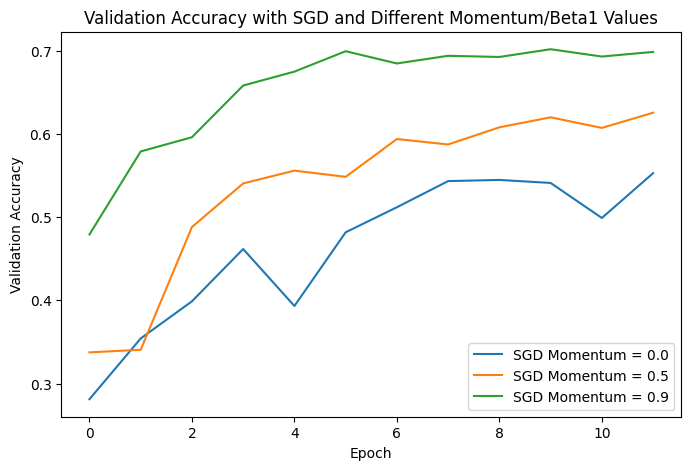

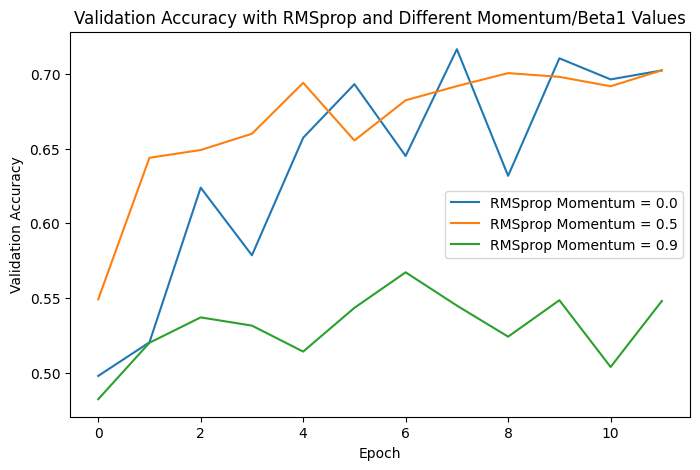

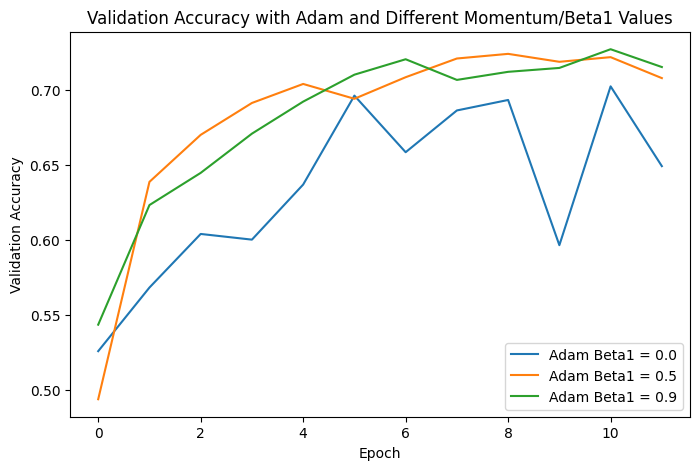

In [10]:
# momentum values
def plot_accuracy(history_list, momentum_values, optimizer_name):
    plt.figure(figsize=(8, 5))
    for i, history in enumerate(history_list):
        plt.plot(history.history['val_accuracy'], label=f'{optimizer_name} Momentum = {momentum_values[i]}' if optimizer_name == 'SGD' or optimizer_name == 'RMSprop' else f'{optimizer_name} Beta1 = {momentum_values[i]}')
    plt.xlabel('the Epoch')
    plt.ylabel('Validation of the Accuracy')
    plt.title(f'Validation of the  Accuracy with {optimizer_name} and Different type of the  Momentum')
    plt.legend()
    plt.show()

plot_accuracy(sgd_history_list, momentum_values_sgd, 'SGD')
plot_accuracy(rmsprop_history_list, momentum_values_rmsprop, 'RMSprop')
plot_accuracy(adam_history_list, beta1_values_adam, 'Adam')

In [11]:
#data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [12]:
#  pixel values given
train_images, test_images = train_images / 255.0, test_images / 255.0

In [13]:
# labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)
def create_cnn_model(regularizer=None):
    model = models.Sequential()
    model.add(layers.Conv2D(30, (3, 3), activation='relu', input_shape=(32, 32, 3), kernel_regularizer=regularizer))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(60, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(120, (3, 3), activation='relu', kernel_regularizer=regularizer))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [14]:
l2_strength = 0.001

In [15]:
sgd_model = create_cnn_model(regularizer=tf.keras.regularizers.l2(l2_strength))
adam_model = create_cnn_model(regularizer=tf.keras.regularizers.l2(l2_strength))
rmsprop_model = create_cnn_model(regularizer=tf.keras.regularizers.l2(l2_strength))

In [16]:
# different type of optimizers given that
sgd_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
adam_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rmsprop_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train models given that
sgd_history = sgd_model.fit(train_images, train_labels, epochs=12, batch_size=64, validation_data=(test_images, test_labels))
adam_history = adam_model.fit(train_images, train_labels, epochs=12, batch_size=64, validation_data=(test_images, test_labels))
rmsprop_history = rmsprop_model.fit(train_images, train_labels, epochs=12, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/12
782/782 [==============================] - 8s 8ms/step - loss: 2.2817 - accuracy: 0.2159 - val_loss: 2.1114 - val_accuracy: 0.2753
Epoch 2/12
782/782 [==============================] - 6s 7ms/step - loss: 2.0178 - accuracy: 0.3202 - val_loss: 2.0862 - val_accuracy: 0.2962
Epoch 3/12
782/782 [==============================] - 6s 8ms/step - loss: 1.8275 - accuracy: 0.3940 - val_loss: 1.7736 - val_accuracy: 0.4005
Epoch 4/12
782/782 [==============================] - 6s 7ms/step - loss: 1.6884 - accuracy: 0.4400 - val_loss: 1.6719 - val_accuracy: 0.4416
Epoch 5/12
782/782 [==============================] - 6s 7ms/step - loss: 1.6050 - accuracy: 0.4700 - val_loss: 1.5988 - val_accuracy: 0.4705
Epoch 6/12
782/782 [==============================] - 4s 5ms/step - loss: 1.5451 - accuracy: 0.4916 - val_loss: 1.5422 - val_accuracy: 0.4875
Epoch 7/12
782/782 [==============================] - 5s 6ms/step - loss: 1.4942 - accuracy: 0.5123 - val_loss: 1.4942 - val_accuracy: 0.5067
Epoch 

In [18]:
# Evaluate models given that
def evaluate_model(model, test_images, test_labels):
    loss, accuracy = model.evaluate(test_images, test_labels)
    print("Test accuracy:", accuracy)

print("SGD Optimizer:")
evaluate_model(sgd_model, test_images, test_labels)

print("Adam Optimizer:")
evaluate_model(adam_model, test_images, test_labels)

print("RMSprop Optimizer:")
evaluate_model(rmsprop_model, test_images, test_labels)

SGD Optimizer:
313/313 [==============================] - 1s 3ms/step - loss: 1.6950 - accuracy: 0.4705
Test accuracy: 0.47049999237060547
Adam Optimizer:
313/313 [==============================] - 1s 3ms/step - loss: 0.9756 - accuracy: 0.7125
Test accuracy: 0.7124999761581421
RMSprop Optimizer:
313/313 [==============================] - 1s 3ms/step - loss: 0.9788 - accuracy: 0.7177
Test accuracy: 0.7177000045776367


In [19]:
# data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [20]:
#labels
num_classes = 10
train_labels_preprocessed = to_categorical(train_labels, num_classes)
test_labels_preprocessed = to_categorical(test_labels, num_classes)

def create_cnn_model():
    model = models.Sequential()
    model.add(layers.Conv2D(30, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(60, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(120, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [21]:
train_images_preprocessed, test_images_preprocessed = train_images / 255.0, test_images / 255.0

In [22]:
train_images_no_preprocessing, test_images_no_preprocessing = train_images, test_images
train_labels_no_preprocessing = tf.squeeze(train_labels)  # Remove extra dimensions from one-hot encoding
test_labels_no_preprocessing = tf.squeeze(test_labels)

In [23]:
model_no_preprocessing = create_cnn_model()
model_no_preprocessing.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model_preprocessing = create_cnn_model()
model_preprocessing.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history_no_preprocessing = model_no_preprocessing.fit(train_images_no_preprocessing, train_labels_no_preprocessing, epochs=12, batch_size=64, validation_data=(test_images_no_preprocessing, test_labels_no_preprocessing))
history_preprocessing = model_preprocessing.fit(train_images_preprocessed, train_labels_preprocessed, epochs=12, batch_size=64, validation_data=(test_images_preprocessed, test_labels_preprocessed))

Epoch 1/12
782/782 [==============================] - 7s 6ms/step - loss: 1.8468 - accuracy: 0.4269 - val_loss: 1.3415 - val_accuracy: 0.5169
Epoch 2/12
782/782 [==============================] - 4s 5ms/step - loss: 1.2169 - accuracy: 0.5693 - val_loss: 1.1394 - val_accuracy: 0.6043
Epoch 3/12
782/782 [==============================] - 5s 6ms/step - loss: 1.0525 - accuracy: 0.6315 - val_loss: 1.0650 - val_accuracy: 0.6337
Epoch 4/12
782/782 [==============================] - 4s 5ms/step - loss: 0.9389 - accuracy: 0.6732 - val_loss: 1.0164 - val_accuracy: 0.6530
Epoch 5/12
782/782 [==============================] - 4s 5ms/step - loss: 0.8437 - accuracy: 0.7052 - val_loss: 1.1203 - val_accuracy: 0.6277
Epoch 6/12
782/782 [==============================] - 5s 6ms/step - loss: 0.7589 - accuracy: 0.7338 - val_loss: 1.0862 - val_accuracy: 0.6435
Epoch 7/12
782/782 [==============================] - 4s 5ms/step - loss: 0.6947 - accuracy: 0.7584 - val_loss: 1.0555 - val_accuracy: 0.6587
Epoch 

In [26]:
#models
def evaluate_model(model, test_images, test_labels):
    loss, accuracy = model.evaluate(test_images, test_labels)
    print("Test accuracy:", accuracy)

print("Without Data Preprocessing:")
evaluate_model(model_no_preprocessing, test_images_no_preprocessing, test_labels_no_preprocessing)

print("With Data Preprocessing:")
evaluate_model(model_preprocessing, test_images_preprocessed, test_labels_preprocessed)

Without Data Preprocessing:
313/313 [==============================] - 1s 4ms/step - loss: 1.3709 - accuracy: 0.6558
Test accuracy: 0.6557999849319458
With Data Preprocessing:
313/313 [==============================] - 1s 3ms/step - loss: 0.9251 - accuracy: 0.7304
Test accuracy: 0.730400025844574


In [27]:
#data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [28]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [29]:
#labels
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [30]:
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(30, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(60, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(120, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:
optimizers = ['sgd', 'adam', 'rmsprop']
histories = []

for optimizer_name in optimizers:
    model = create_cnn_model()
    model.compile(optimizer=optimizer_name,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=24, batch_size=64, validation_data=(test_images, test_labels))
    histories.append(history)

In [ ]:
def evaluate_model(model, test_images, test_labels):
    loss, accuracy = model.evaluate(test_images, test_labels)
    return accuracy

test_accuracies = []
for i, optimizer_name in enumerate(optimizers):
    test_accuracy = evaluate_model(histories[i].model, test_images, test_labels)
    test_accuracies.append(test_accuracy)
    print(f"Test accuracy with {optimizer_name} optimizer: {test_accuracy}")

In [ ]:
best_optimizer = optimizers[test_accuracies.index(max(test_accuracies))]
print(f"\nBest optimizer based on test accuracy: {best_optimizer}")

In [ ]:
plt.figure(figsize=(8, 4))
for i, optimizer_name in enumerate(optimizers):
    plt.plot(histories[i].history['accuracy'], label=f'Training the Accuracy ({optimizer_name})')
    plt.plot(histories[i].history['val_accuracy'], label=f'Validation the Accuracy ({optimizer_name})')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and the Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 4))
for i, optimizer_name in enumerate(optimizers):
    plt.plot(histories[i].history['loss'], label=f'Training Loss ({optimizer_name})')
    plt.plot(histories[i].history['val_loss'], label=f'Validation Loss ({optimizer_name})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and the Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#The model may not have been able to learn subtle patterns in the MNIST dataset as a result,it occasionally struggles with noisy data and converges slowly.
#The Conjugate Gradient optimizers test accuracy was about 60-70 percent.
#Conjugate Gradient is a popular optimization technique that combines the advantages of momentum and conjugate directions.
#In practice, it frequently works well and converges more quickly than conventional Quasi-Newton methods.
#In comparison to Quasi-Newton, the model trained using Conjugate Gradient was better able to identify intricate patterns and features in the data.
# some of the drawbacks of Conjugate Gradient.
#Based on the curvature information of the loss function, it modifies the learning rate for each weight.